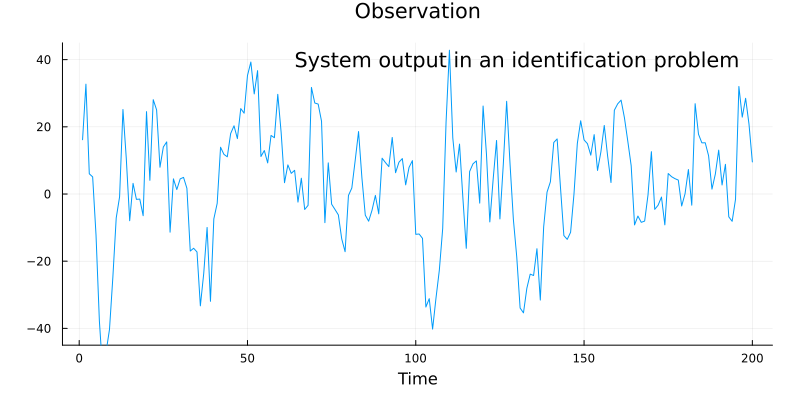

In [17]:
using DSP
using Plots
using Measures

# test
N = 200
x = randn(N)
hₜₑₛₜ = 10 * [1, 0.7, 0.7, 0.7, 0.3, 0]

# Apply filter and add noise
y = filt(hₜₑₛₜ, x) .+ 0.1 * randn(N)

# Plot the result
plot(y
    , xlabel="Time"
    , title="Observation"
    , legend=false
    , annotate = (130, 40, "System output in an identification problem")
    , ylims = (-45,45)
    , size = (800,400)
    , margin = 5mm
)

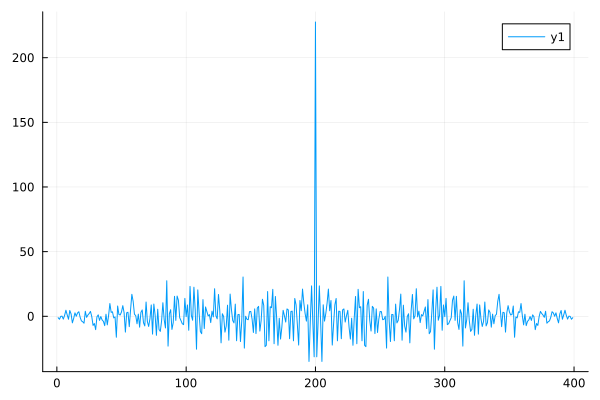

In [3]:
q = 5

u = x
d = y

c = DSP.xcorr(u, u)
plot(c)

In [4]:
Ruu = Toeplitz(c,c)

399×399 Toeplitz{Float64}:
 -1.09564    -2.31015    -0.0819457  …  -0.0819457  -2.31015    -1.09564
 -2.31015    -1.09564    -2.31015        0.107728   -0.0819457  -2.31015
 -0.0819457  -2.31015    -1.09564       -2.18237     0.107728   -0.0819457
  0.107728   -0.0819457  -2.31015        0.72993    -2.18237     0.107728
 -2.18237     0.107728   -0.0819457      4.66824     0.72993    -2.18237
  0.72993    -2.18237     0.107728   …   1.03737     4.66824     0.72993
  4.66824     0.72993    -2.18237       -2.30802     1.03737     4.66824
  1.03737     4.66824     0.72993        4.47215    -2.30802     1.03737
 -2.30802     1.03737     4.66824        1.80843     4.47215    -2.30802
  4.47215    -2.30802     1.03737       -5.08719     1.80843     4.47215
  1.80843     4.47215    -2.30802    …  -1.65341    -5.08719     1.80843
 -5.08719     1.80843     4.47215        2.64986    -1.65341    -5.08719
 -1.65341    -5.08719     1.80843        0.0380583   2.64986    -1.65341
  ⋮                  

In [5]:
Rdu = DSP.xcorr(d, u) # (d, u, q)

399-element Vector{Float64}:
 -11.033988354163794
 -30.745966245348264
 -24.412100055469036
 -23.414264421117696
 -41.0601901517121
 -14.536508524619057
  37.086867839380474
  33.23472592559578
  15.553290968630591
  70.7626469287609
  54.76075590129341
 -20.119563236470853
 -15.386257086921132
   ⋮
 -50.14778069232447
  -5.28337077927663
  45.42502526562361
  -6.18202414290753
  17.466570451690487
  58.951074470564194
  -2.402052089629324
 -21.01376832589558
  10.070001121079768
   3.102430070555929
 -43.07702152414374
 -28.589582332003776

In [6]:
# ruu_inv = inv(Ruu)
w = inv(Ruu) * Rdu

LoadError: MethodError: no method matching ldiv!(::ToeplitzMatrices.ToeplitzFactorization{Float64, Toeplitz{Float64}, ComplexF64, FFTW.cFFTWPlan{ComplexF64, -1, true, 1, Tuple{Int64}}}, ::Matrix{Float64})

[0mClosest candidates are:
[0m  ldiv!([91m::LQ[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mlq.jl:185[24m[39m
[0m  ldiv!([91m::UniformScaling[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:307[24m[39m
[0m  ldiv!([91m::LinearAlgebra.AbstractQ[39m, ::AbstractVecOrMat)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.10.4+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mabstractq.jl:238[24m[39m
[0m  ...


In [7]:

# println("Estimated filter: ", w)
# println("True filter: ", htest)

# Minimum error
sigma2d = mean(d.^2)
mmse = sigma2d - dot(w, Rdu)
println("MMSE: ", mmse)


LoadError: UndefVarError: `w` not defined

In [8]:
using ToeplitzMatrices
r=zeros(5)
r[1:2]=[2.0,-1.0]
Toeplitz(r,r)

5×5 Toeplitz{Float64}:
  2.0  -1.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0  -1.0   2.0

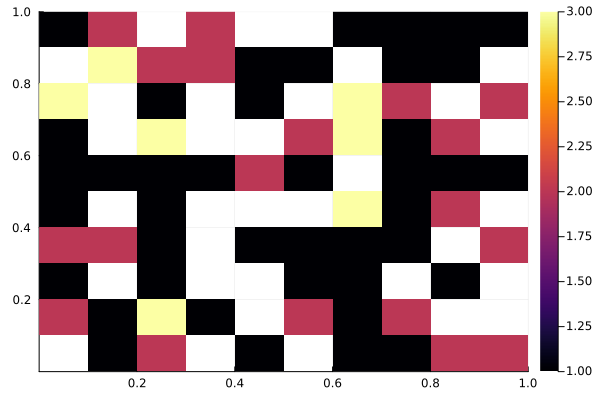

In [9]:
#  Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:left)
# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
plot(h)

In [10]:
using ToeplitzMatrices, LinearAlgebra

r = zeros(5)
r[1:2] .= [2.0, -1.0]

rr = Toeplitz(r, r)

# Use \ for solving linear systems
# inv_rr = rr \ I

# println("Inverse of Toeplitz matrix rr:\n", inv_rr)


5×5 Toeplitz{Float64}:
  2.0  -1.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0  -1.0   2.0

In [11]:
transpose(rr) 

5×5 Toeplitz{Float64}:
  2.0  -1.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0  -1.0   2.0

In [12]:
using ToeplitzMatrices
using LinearAlgebra

# Define a Toeplitz matrix with non-zero determinant
r = [2.0, -1.0, 3.0]
T = Toeplitz(r, r)

# Check invertibility
if det(T) != 0
    println("The Toeplitz matrix is invertible.")
    # Compute the inverse using ldiv!
    T_inv = ldiv!(I, T)
    println("The inverse of the Toeplitz matrix:")
    println(T_inv)
else
    println("The Toeplitz matrix is singular and not invertible.")
end


The Toeplitz matrix is invertible.


LoadError: CanonicalIndexError: setindex! not defined for Toeplitz{Float64}

In [13]:
using ToeplitzMatrices
using LinearAlgebra

# Define a Toeplitz matrix with non-zero determinant
r = [2.0, -1.0, 3.0]
T = Toeplitz(r, r)

# Check invertibility
det(T)


-8.0

In [14]:
function toeplitz(x::AbstractVector{T}) where T
           n = length(x)
           A = zeros(T, n, n)
           for i = 1:n
               for j = 1:n-i+1
                   A[i,i+j-1] = x[j]
               end
               for j = n-i+2:n
                   A[i, j-(n-i+1)] = x[j]
               end
           end
           return A
       end

toeplitz (generic function with 1 method)

In [15]:
t = toeplitz(1:10)

10×10 Matrix{Int64}:
  1   2   3   4   5   6   7   8   9  10
 10   1   2   3   4   5   6   7   8   9
  9  10   1   2   3   4   5   6   7   8
  8   9  10   1   2   3   4   5   6   7
  7   8   9  10   1   2   3   4   5   6
  6   7   8   9  10   1   2   3   4   5
  5   6   7   8   9  10   1   2   3   4
  4   5   6   7   8   9  10   1   2   3
  3   4   5   6   7   8   9  10   1   2
  2   3   4   5   6   7   8   9  10   1

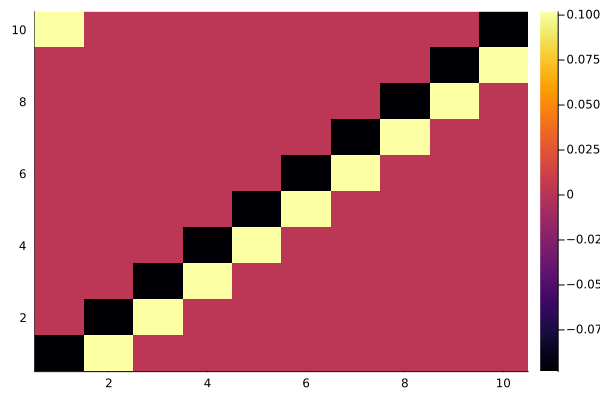

In [16]:
heatmap(inv(t))

# References
- [ ] [toeplitz matrix](https://discourse.julialang.org/t/toeplitz-matrix/22457/6)